In [8]:
import pandas as pd
df = pd.read_csv('Covid Dataset (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [7]:
for i in df.columns:
    df[i] = (df[i] == 'Yes').astype(int)

In [3]:
df['COVID-19'].value_counts()

1    4383
0    1051
Name: COVID-19, dtype: int64

<AxesSubplot:xlabel='COVID-19'>

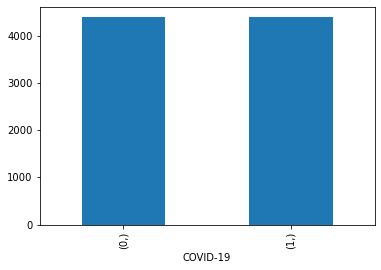

In [4]:
from sklearn.utils import resample
df_majority = df[df['COVID-19'] == 1]
df_minority = df[df['COVID-19'] == 0]
df_min_up = resample(df_minority, replace = True, n_samples = 4383, random_state = 1)
df_up = pd.concat([df_min_up, df_majority])
df_up.value_counts(['COVID-19']).plot.bar()

In [5]:
X = df_up.iloc[:, :-1]
y = df_up['COVID-19']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


0.9904942965779467


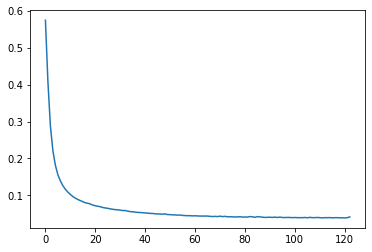

In [6]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=600)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
import matplotlib.pyplot as plt
plt.plot(model.loss_curve_)